Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve

Importing the Cancer dataset

In [2]:
data= pd.read_csv('C:\\Users\\lucif\\Documents\\Jupiter_Notebook\\Datasets\\train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Spliting Independent and Dependent Variables

In [4]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [5]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
sc=StandardScaler()
x=sc.fit_transform(x)

Creating Classifier object and fitting to our training data

In [8]:
logistic=LogisticRegression(verbose=1,multi_class='ovr',max_iter=10000)

In [9]:
logistic.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [10]:
testing_data = pd.read_csv("C:/Users/lucif/Documents/Jupiter_Notebook/Datasets/mnist_test.csv")

In [11]:
testing_labels = testing_data['label']
testing_data.drop(['label'],axis=1,inplace=True)
testing_data=sc.transform(testing_data)

Predicting the result on the test data and plotting the result

In [12]:
ypred=logistic.predict(testing_data)
acc=logistic.score(testing_data,testing_labels)
print('Accuracy = ',acc*100)

Accuracy =  92.93


In [13]:
cm=confusion_matrix(testing_labels,ypred)
cm

array([[ 966,    0,    2,    1,    1,    2,    3,    2,    2,    1],
       [   0, 1114,    3,    1,    1,    2,    4,    0,   10,    0],
       [   5,    6,  930,   15,    8,    8,   10,   11,   36,    3],
       [   3,    1,   18,  930,    2,   16,    4,   11,   15,   10],
       [   2,    2,    5,    3,  918,    0,    8,    5,    5,   34],
       [   8,    2,    0,   30,    7,  791,   15,    5,   26,    8],
       [   7,    3,    4,    2,    5,   18,  916,    0,    3,    0],
       [   2,    8,   21,    2,    3,    0,    1,  954,    6,   31],
       [   9,    9,    8,   19,   11,   23,    7,    9,  870,    9],
       [   9,    8,    0,   15,   28,   11,    0,   24,   10,  904]],
      dtype=int64)

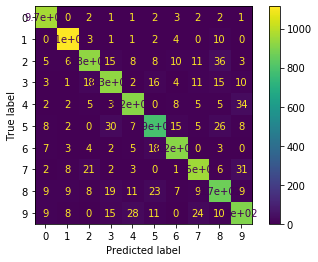

In [14]:
plot_confusion_matrix(logistic,testing_data,testing_labels)